In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/225.0

model = Sequential()
model.add(Conv2D(256, kernel_size = (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256,  kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(256, kernel_size = (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["acc"])

model.fit(X, y, epochs = 20, validation_split = 0.1)

Epoch 1/20
395/395 [==============================] - 7s 17ms/step - loss: 1.2759 - acc: 0.4751 - val_loss: 1.1300 - val_acc: 0.5598
Epoch 2/20
395/395 [==============================] - 7s 17ms/step - loss: 0.9616 - acc: 0.6279 - val_loss: 0.9625 - val_acc: 0.6311
Epoch 3/20
395/395 [==============================] - 7s 17ms/step - loss: 0.8024 - acc: 0.6961 - val_loss: 0.7446 - val_acc: 0.7279
Epoch 4/20
395/395 [==============================] - 7s 17ms/step - loss: 0.6951 - acc: 0.7382 - val_loss: 0.7349 - val_acc: 0.7244
Epoch 5/20
395/395 [==============================] - 7s 17ms/step - loss: 0.6274 - acc: 0.7650 - val_loss: 0.7559 - val_acc: 0.7286
Epoch 6/20
395/395 [==============================] - 7s 17ms/step - loss: 0.5670 - acc: 0.7855 - val_loss: 0.8312 - val_acc: 0.6952
Epoch 7/20
395/395 [==============================] - 7s 17ms/step - loss: 0.5036 - acc: 0.8086 - val_loss: 0.7753 - val_acc: 0.7272
Epoch 8/20
395/395 [==============================] - 7s 17ms/step - 

In [ ]:
X.shape

(14034, 50, 50, 1)

In [13]:
model.evaluate(X, y)

439/439 [==============================] - 3s 7ms/step - loss: 0.2248 - acc: 0.9541


[0.22483915090560913, 0.9541114568710327]

In [14]:
predictions = model.predict([X])

In [15]:
import numpy as np

hm = {}
hm[0] = "buildings"
hm[1] = "forest"
hm[2] = "glacier"
hm[3] = "mountain"
hm[4] = "sea"
hm[5] = "street"
for i in range(15):
  pred = (np.argmax(predictions[i]))
  print(hm[pred])

glacier
buildings
sea
mountain
street
street
forest
mountain
sea
sea
buildings
glacier
forest
buildings
forest


In [16]:
import matplotlib.pyplot as plt
for i in range(15):
  real = (y[i])
  print(hm[real])

glacier
buildings
sea
mountain
street
street
forest
mountain
sea
sea
buildings
glacier
forest
buildings
forest


In [18]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

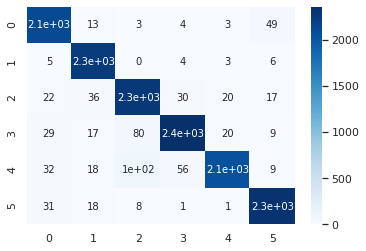

In [19]:
rounded_predictions = model.predict_classes(X, batch_size=128, verbose=0)
cm = confusion_matrix(y, rounded_predictions)
ax = sns.heatmap(cm, annot=True, cmap="Blues")

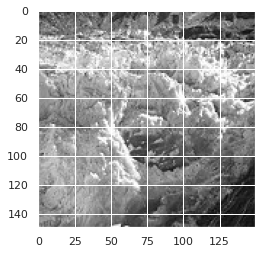

glacier


In [82]:
import cv2
image = cv2.imread("20087.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")
plt.show()
new_image = cv2.resize(image, (50,50))
t = np.array(new_image).reshape(-1, 50, 50, 1)
t.shape
model.predict(t)
curr = np.argmax(model.predict(t), axis = 1)
ans = curr[0]
print(hm.get(ans))
